<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/2019_survey_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.express as px
import missingno as msno
import networkx as nx
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install plotly.express

In [5]:
pip install plotly

In [2]:
data = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/kaggle survey/2019/multiple_choice_responses.csv')

Text(0.5, 1.0, '# of Sub-Question')

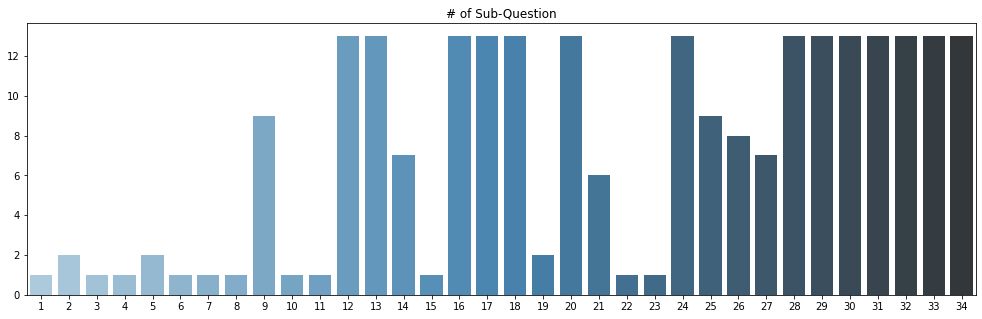

In [11]:
lst = []
for i in data.columns[1:]:
  lst.append(i.split('_')[0])

lst = pd.Series(lst).apply(lambda x: int(x[1:]))
cnt = lst.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(17,5))
sns.barplot(cnt.index, cnt, palette='Blues_d', ax=ax)
ax.set_title('# of Sub-Question')

In [3]:
dist = data[['Q1', 'Q2', 'Q3']]
dist = dist.rename(columns={'Q1':'Age', 'Q2':'Gender', 'Q3':'Country'})
dist.drop(0, axis=0, inplace=True)

In [7]:
dist

,Age,Gender,Country
1,22-24,Male,France
2,40-44,Male,India
3,55-59,Female,Germany
4,40-44,Male,Australia
5,22-24,Male,India
...,...,...,...
19713,50-54,Male,Japan
19714,18-21,Male,India
19715,35-39,Male,India
19716,25-29,Male,India


In [16]:
!pip install pywaffle

     |████████████████████████████████| 532kB 7.7MB/s 


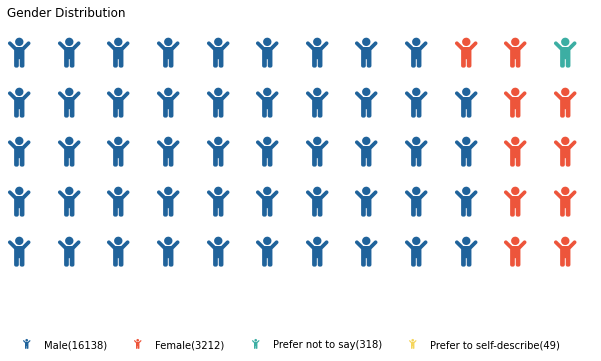

In [10]:
from pywaffle import Waffle

gender = dist['Gender'].value_counts()

fig = plt.figure(
    FigureClass = Waffle,
    rows=5,
    columns=12,
    values=gender,
    colors=('#20639B', '#ED553B', '#3CAEA3', '#F5D55C'),
    title={'label':'Gender Distribution', 'loc':'left'},
    labels=['{}({})'.format(a,b) for a, b in zip(gender.index, gender)],
    legend={'loc':'lower left', 'bbox_to_anchor':(0,-0.4), 'ncol':len(dist['Gender'].unique()), 'framealpha':0},
    font_size=30,
    icons='child',
    figsize=(12,5),
    icon_legend=True
)

Text(0.5, 1.0, 'Age & Gender Distribution')

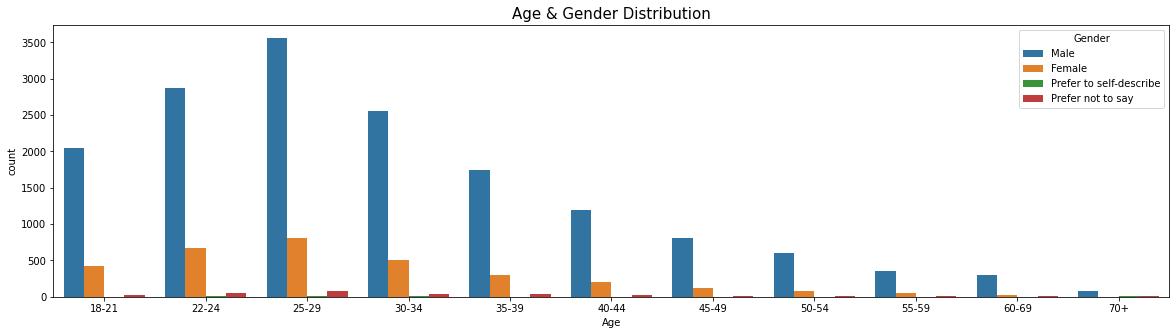

In [12]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x='Age', hue='Gender', data=dist, order=dist['Age'].value_counts().sort_index().index)
plt.title('Age & Gender Distribution', size=15)

In [13]:
y = dist.Country.value_counts()

fig=go.Figure(go.Treemap(
    labels=y.index,
    parents = ['World'] * len(y),
    values = y
))
fig.update_layout(title = '# of Survey Participants')

In [22]:
px.choropleth(y, locations=y.index, locationmode='country names', color=y, color_continuous_scale=px.colors.sequential.deep)

In [27]:
dist_ratio = dist.groupby('Country')['Gender'].value_counts().unstack().fillna(0)
dist_ratio['Female/Male'] = dist_ratio['Female'] / dist_ratio['Male']
dist_ratio['Country'] = dist_ratio.index

In [42]:
from plotly.subplots import make_subplots

x = dist.Country.value_counts()[:7].index

y_saving = dist.groupby('Country').count().loc[x]['Gender']
y_net_worth = dist_ratio.loc[x]['Female/Male']

x = dist.Country.value_counts()[:7].index

fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True, shared_yaxes=False,
                    vertical_spacing=.001)

fig.append_trace(go.Bar(
    x=y_saving,
    y=x,
    marker=dict(
        color='rgba(50, 171, 96, .6)',
        line=dict(color='rgba(50, 171, 96, 1.0)',
        width=1)
    ),
    name='Survey Participants',
    orientation='h'
),1,1)

fig.append_trace(go.Scatter(
    x=y_net_worth, y=x,
    mode='lines+markers',
    line_color='rgb(128, 0, 128)',
    name='Female / male ratio',
), 1, 2)

fig.update_layout(
    title='Top 7 Participants by Country',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
        dtick=1000
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=0.05,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_s = np.round(y_saving, decimals=2)
y_nw = np.round(y_net_worth, decimals=4)

for ydn, yd, xd in zip(y_nw, y_s, x):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn+0.03,
                            text='{:,}'.format(ydn) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 200,
                            text=str(yd),
                            font=dict(family='Arial', size=12,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.2, y=-0.109,
                        text='Most countries with a lot of participants can see that the female / male ratio is below the average.',
                        font=dict(family='Arial', size=10, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

In [46]:
data_1 = data[['Q19', 'Q23']]
data_1.drop(0, axis=0, inplace=True)
data_1

,Q19,Q23
1,Python,1-2 years
2,NaN,NaN
3,NaN,NaN
4,Python,2-3 years
5,Python,< 1 years
...,...,...
19713,NaN,NaN
19714,NaN,NaN
19715,NaN,NaN
19716,NaN,NaN


In [47]:
fig = px.histogram(data_1.dropna(), x='Q23', y='Q23', color='Q19', template='ggplot2')
fig.update_layout()

In [5]:
data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par..